In [1]:
import sys, os, glob
root_dir = "/home/gddaslab/mxp140/tcr_project_ultimate/"
sys.path.append(root_dir)


import numpy as np
import pandas as pd
from pdf import pdf
from plot_pdf import plot_pdf
import matplotlib.pyplot as plt

In [3]:
full_data = pd.read_csv(f"{root_dir}/data/BrMET_and_GBM_data.csv", sep=",")
patients = np.unique(full_data['Patient'].values).astype(object)

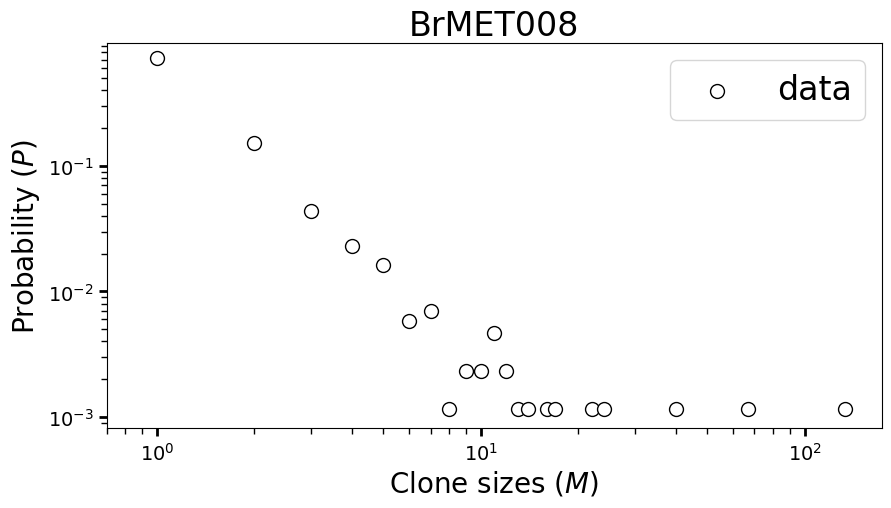

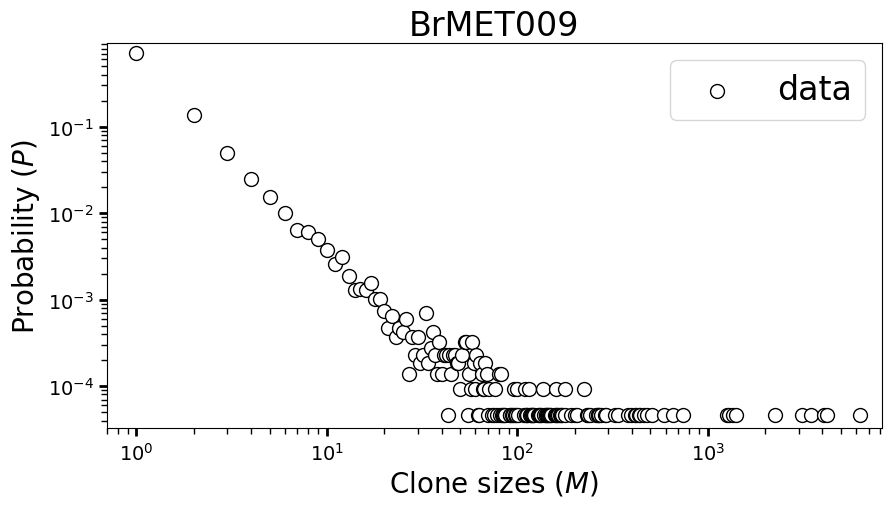

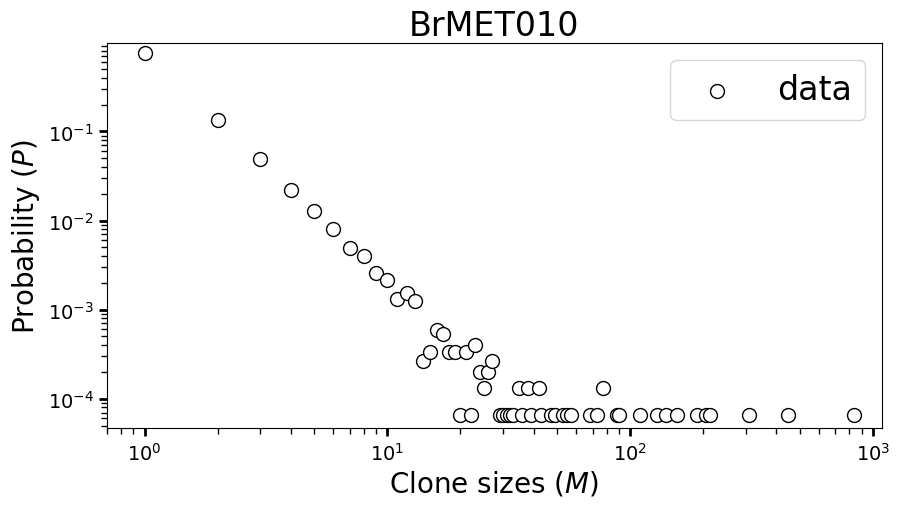

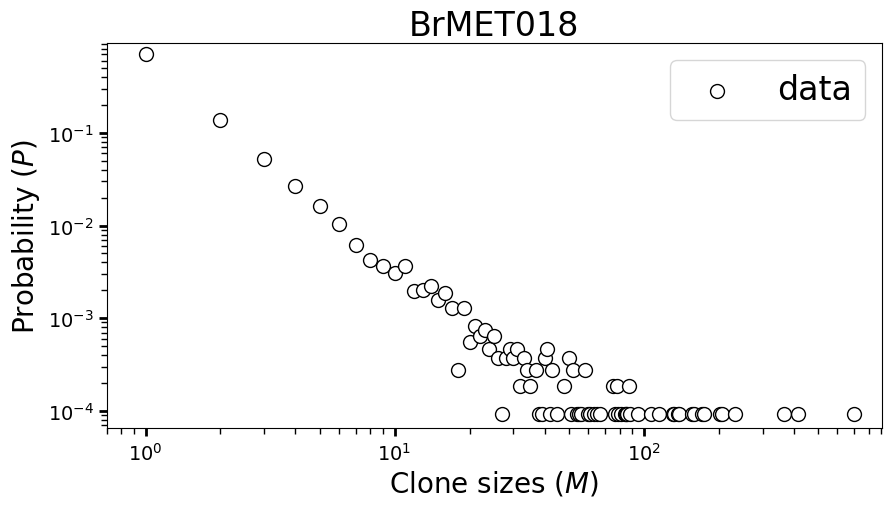

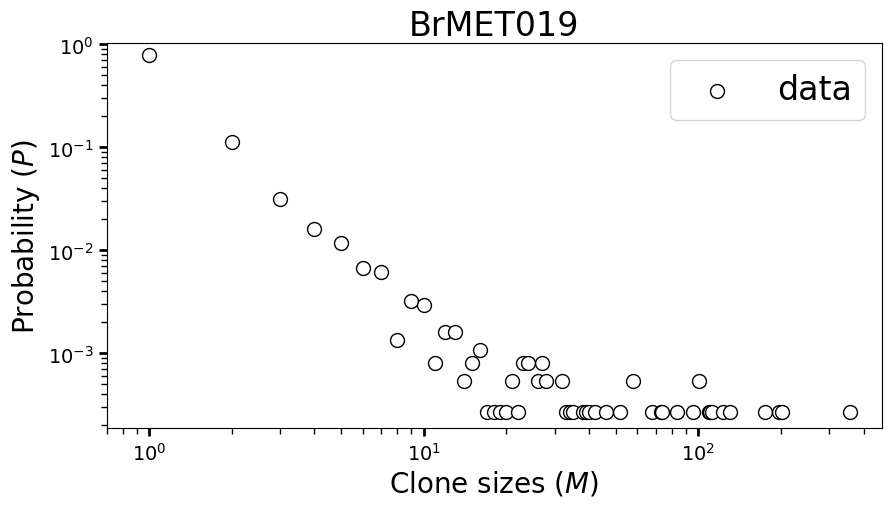

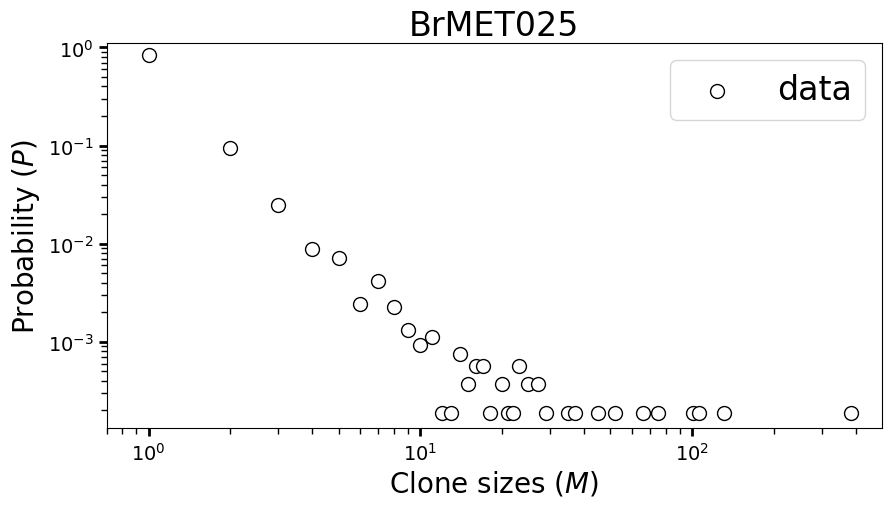

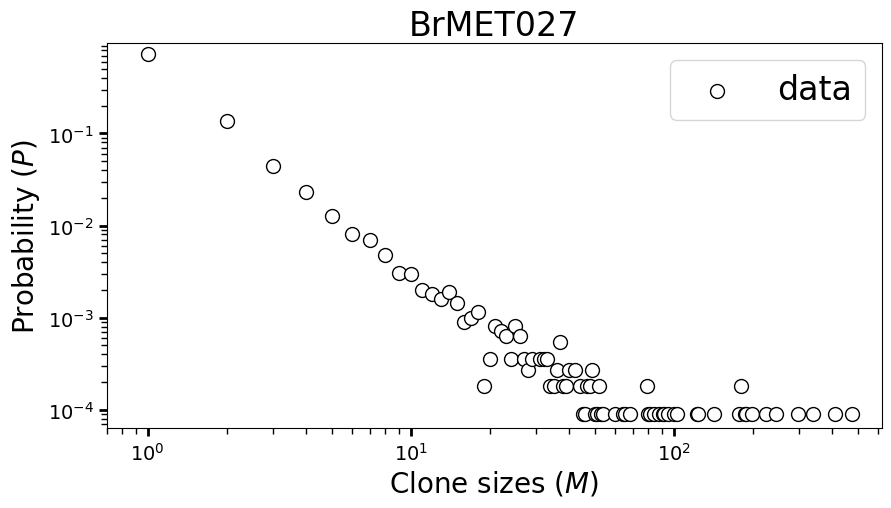

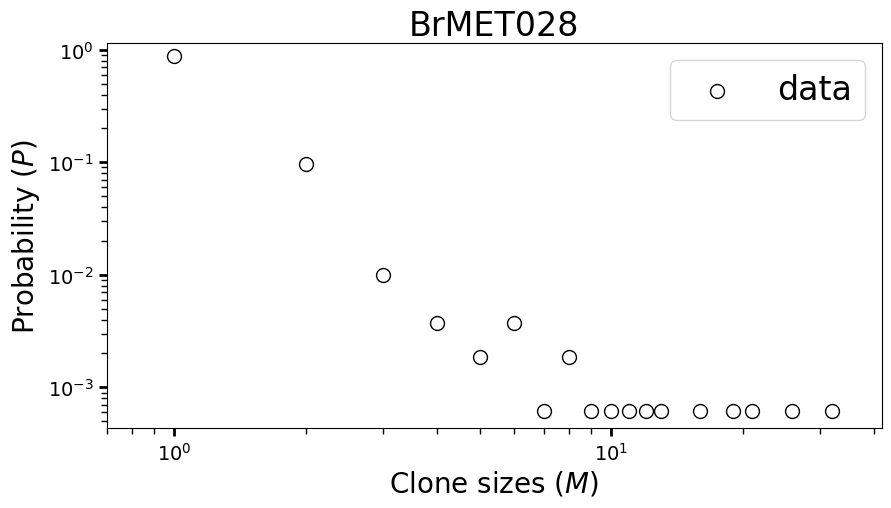

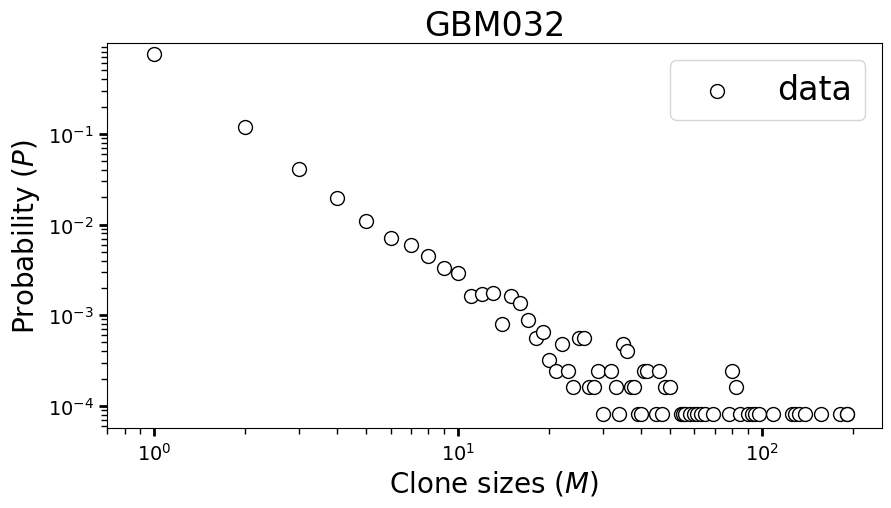

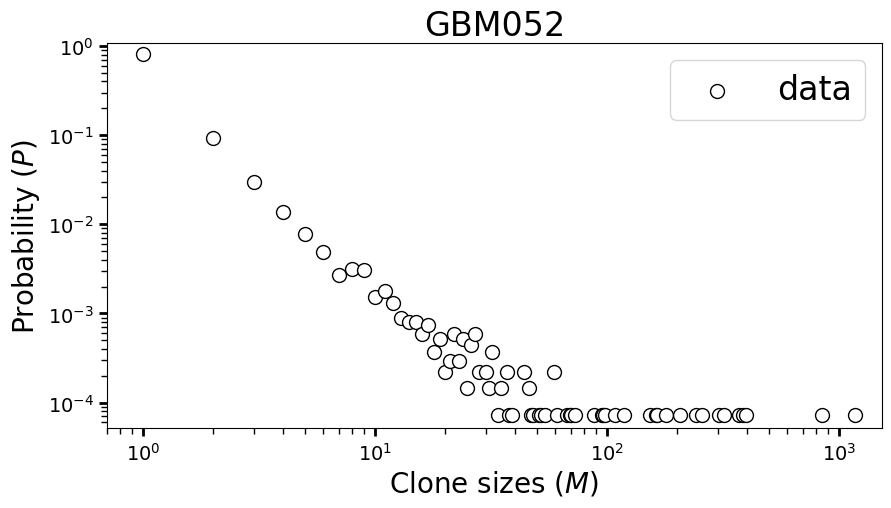

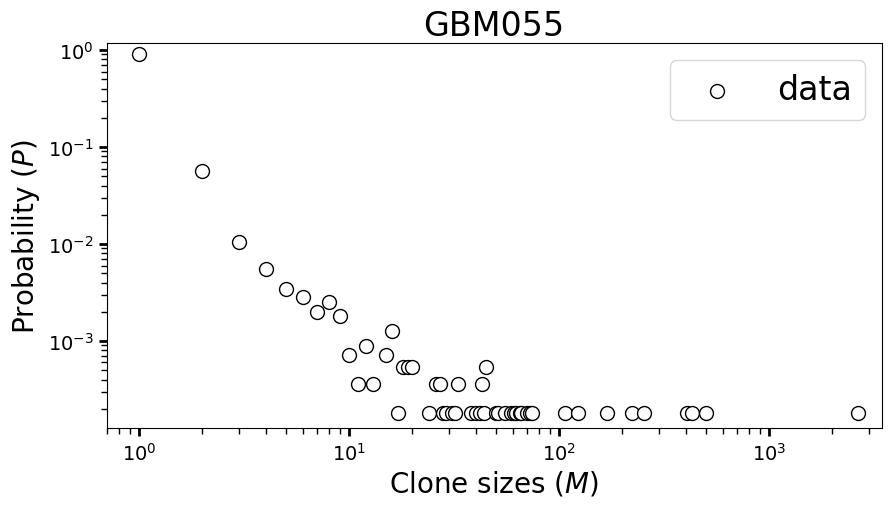

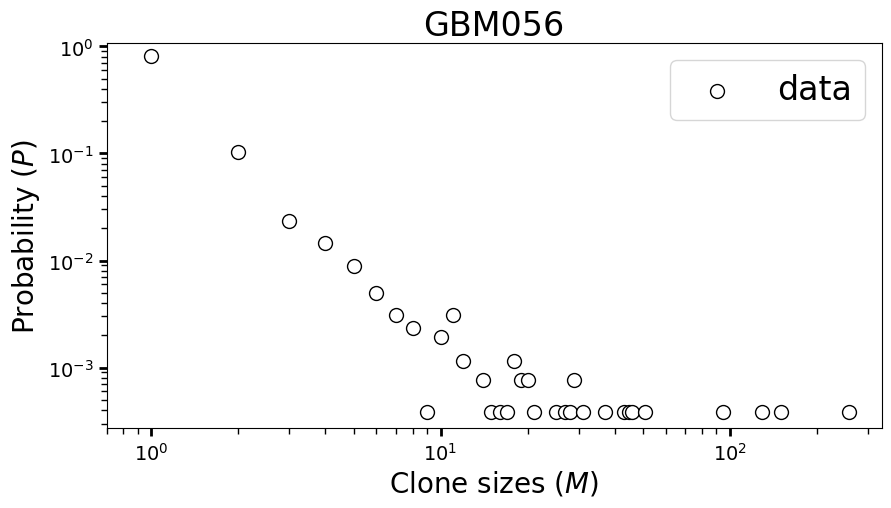

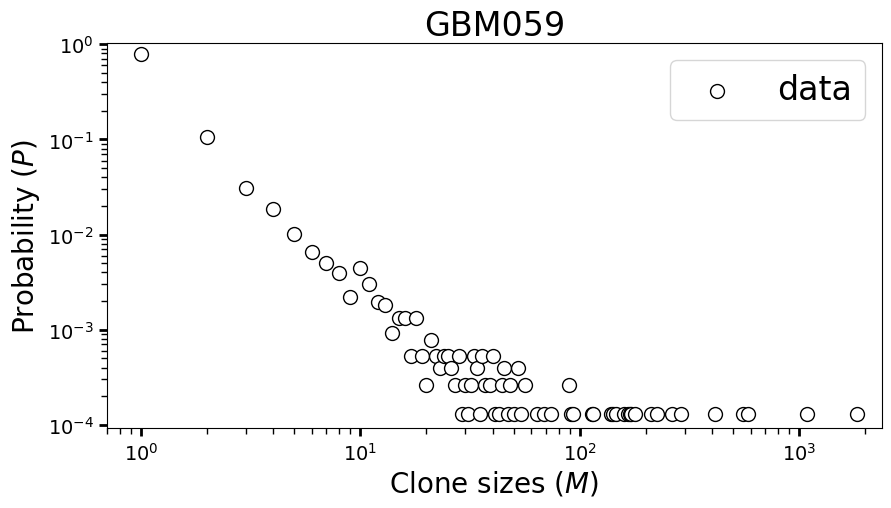

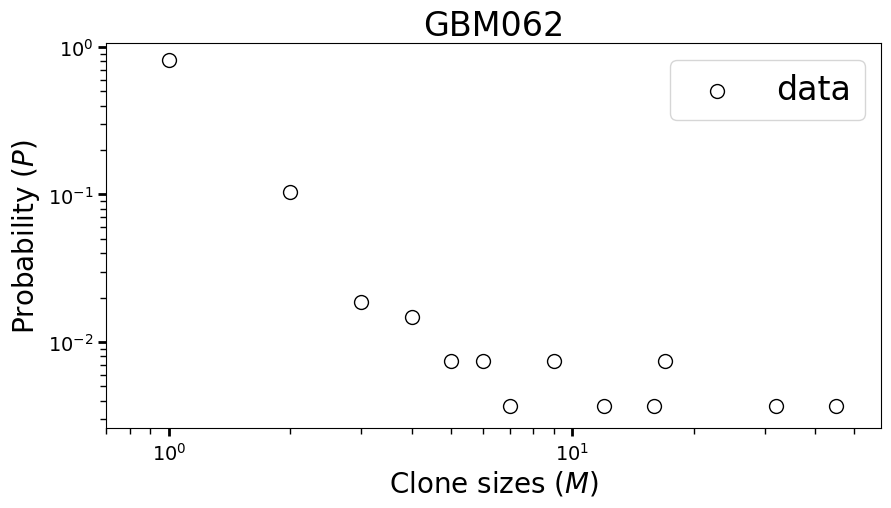

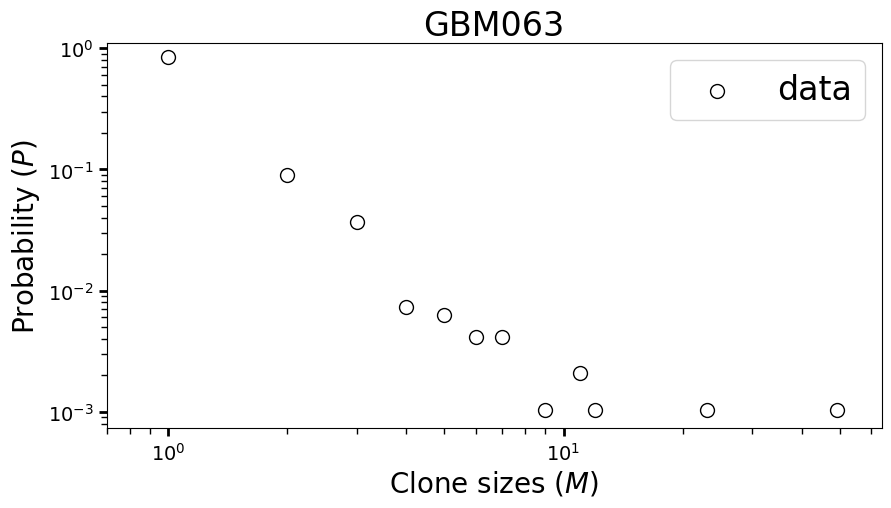

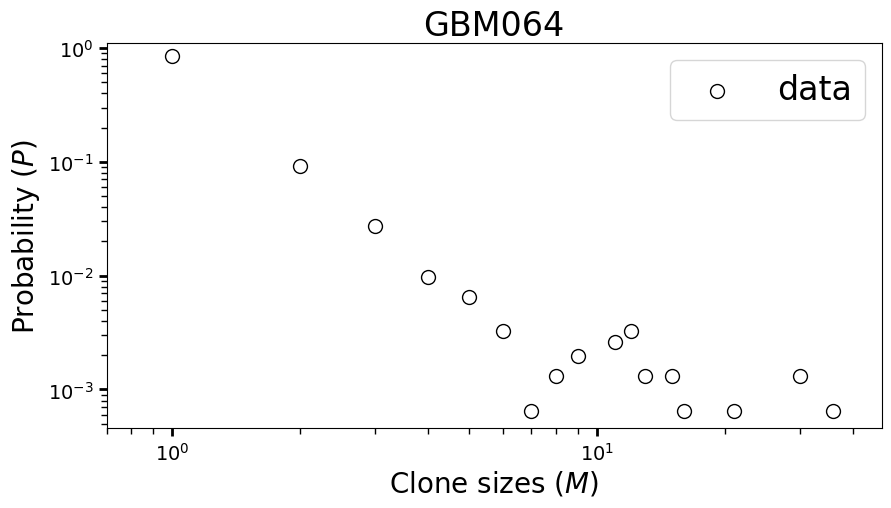

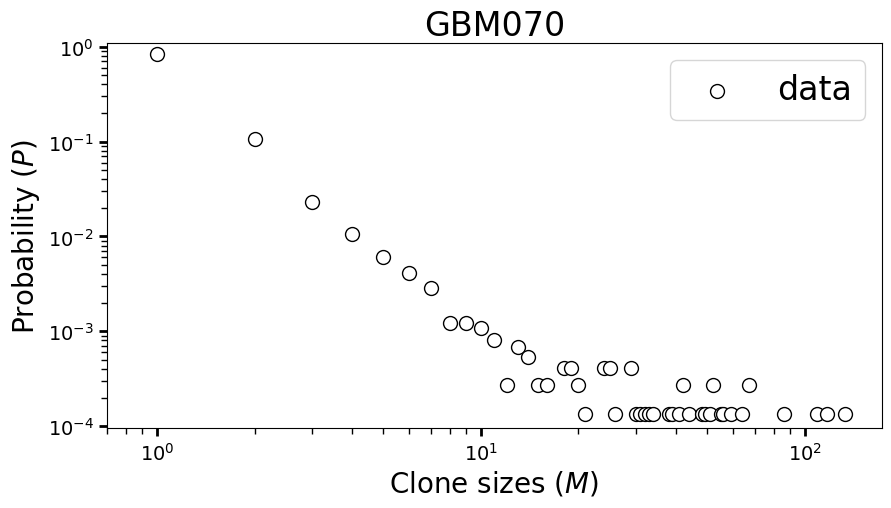

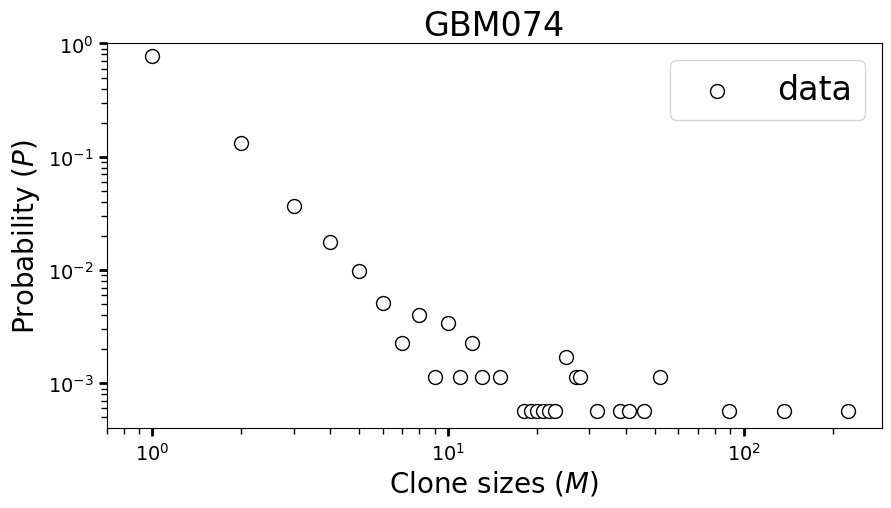

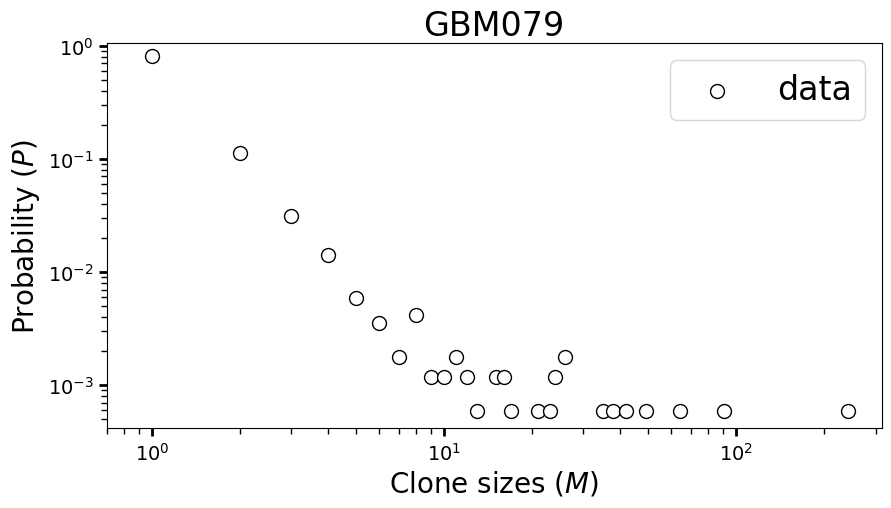

In [4]:
for patient_id in patients[:]:
    patient_data = full_data[full_data["Patient"]==patient_id]
    clone_count_values = patient_data["counts"].values
    fig, ax = plot_pdf(clone_count_values)
    ax.set_title(f'{patient_id}', fontsize=24)
    ax.legend(loc='best', fontsize=24)
    ax.set_xlabel(r"Clone sizes ($M$)", fontsize=20)
    ax.set_ylabel('Probability ($P$)', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=2)
    ax.tick_params(axis='both', which='minor', labelsize=12, length=4, width=1)
    plt.show()

73
11
31


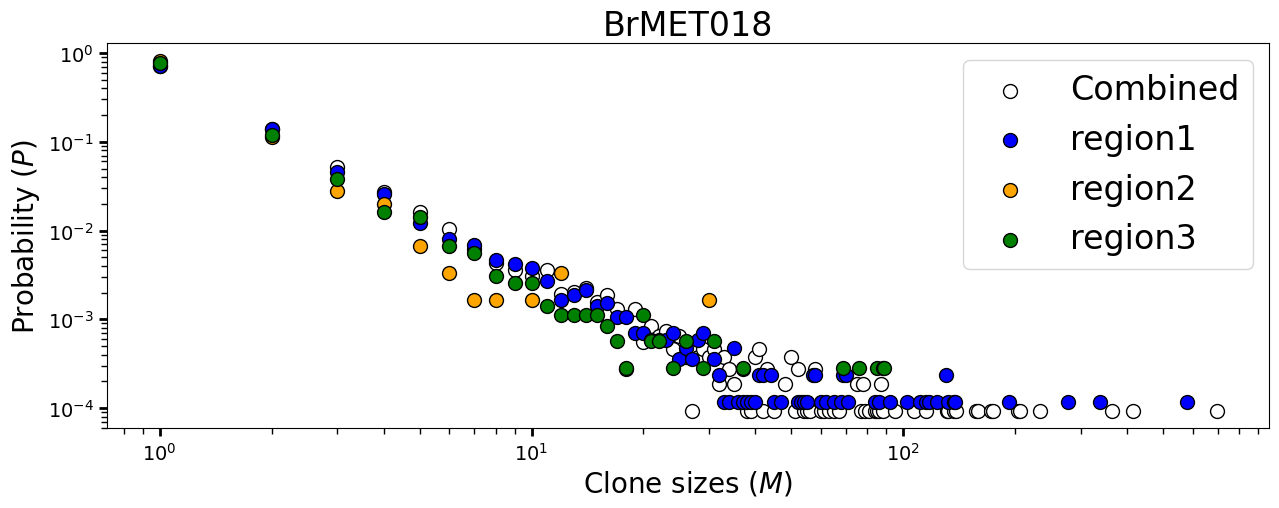

In [3]:
def plot_pdf_by_region(patient_id):
    data_dir = "/home/gddaslab/mxp140/tcr_project_ultimate/data/glioblastoma_data/"
    filepaths = os.path.join(data_dir, patient_id, f"{patient_id}_region*.csv")
    files = glob.glob(filepaths)
    sorted_files = sorted(files, key=lambda x: int(x.split("region")[1].split(".")[0]))
    region_labels = [f'region{file.split("region")[1].split("_")[0][:-4]}' for file in sorted_files]
    # print(region_labels)
    data = []
    colors = ["blue", "orange", "green", "red"]

    # Add PBMC file check and loading
    pbmc_file = os.path.join("/home/gddaslab/lab/data/nih_brain_tumor_data/TCR_Seq/", f"{patient_id}_PBMC_TCRB.tsv")
    has_pbmc = os.path.exists(pbmc_file)

    for file in sorted_files:
        df = pd.read_csv(file, sep=",",)
        data.append(df)

    full_data = pd.read_csv(
        f"/home/gddaslab/mxp140/tcr_project_ultimate/data/BrMET_and_GBM_data.csv",
        sep=",",
        comment="#",
    )
    patient_data = full_data[
        full_data["Patient"].str.contains(patient_id)
    ].reset_index()
    patient_data = full_data[full_data["Patient"]==patient_id]
    clone_count_values = patient_data["counts"].values
    
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(15, 5),
        # dpi=220,
    )
    x_combined, y_combined = pdf(clone_count_values)
    ax.scatter(
            x_combined,
            y_combined,
            s=100,
            facecolors='white',
            edgecolors="black",
            label=f"Combined",
        )
    for i, regional_data in enumerate(data):
        if regional_data.empty:
            continue
        # print(regional_data)
        # a = list(regional_data.iloc[:, 1])
        x_regional, y_regional = pdf(list(regional_data.iloc[:, 2]))
        print(len(x_regional))
        ax.scatter(
            x_regional,
            y_regional,
            s=100,
            facecolors=colors[i],
            edgecolors="black",
            label=region_labels[i],
        )
    if has_pbmc:
        pbmc_df = pd.read_csv(
            pbmc_file, 
            sep="\t", 
            usecols=["aminoAcid", "count (templates/reads)"]
        )
        pbmc_df = pbmc_df.dropna(subset=["aminoAcid"])
        pbmc_df = pbmc_df.groupby("aminoAcid", as_index=False)["count (templates/reads)"].sum()
        x_pbmc, y_pbmc = pdf(list(pbmc_df.iloc[:, 1]))
        ax.scatter(
            x_pbmc,
            y_pbmc,
            s=100,
            facecolors='purple',
            edgecolors="black",
            label="PBMC",
        )
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc="best", fontsize=24)
    ax.set_title(f"{patient_id}", fontsize=24)
    ax.set_xlabel(r"Clone sizes ($M$)", fontsize=20)
    ax.set_ylabel('Probability ($P$)', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=2)
    ax.tick_params(axis='both', which='minor', labelsize=12, length=4, width=1)
    plt.show()
plot_pdf_by_region('BrMET018')

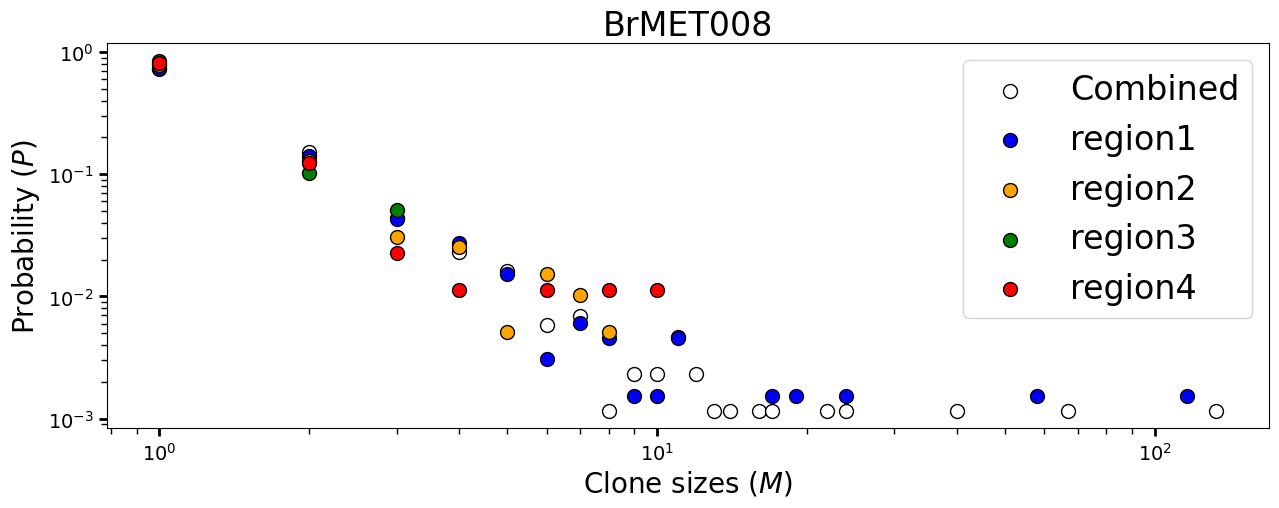

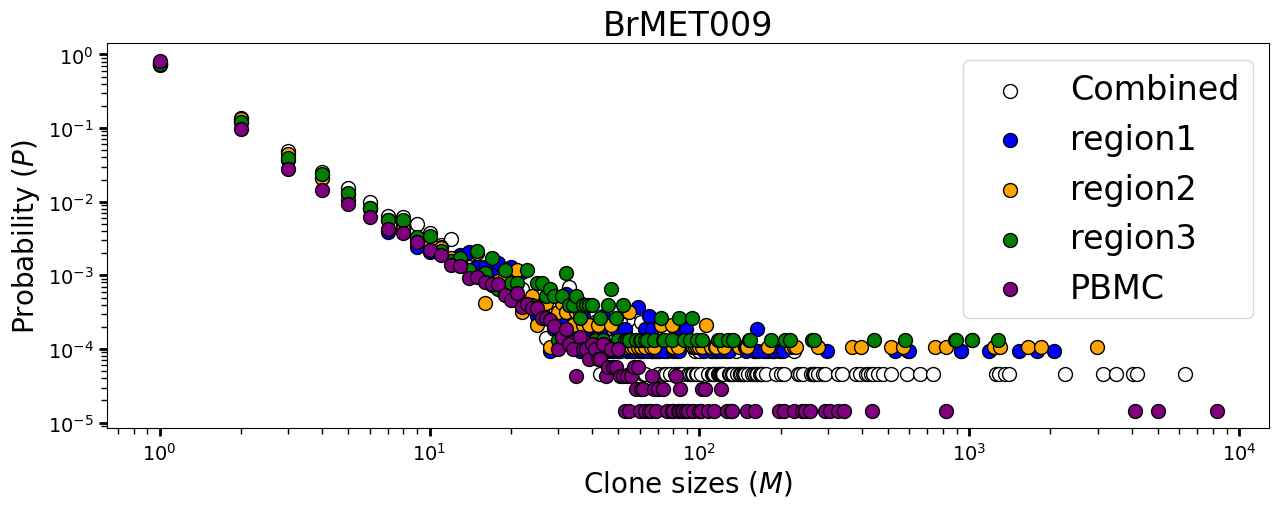

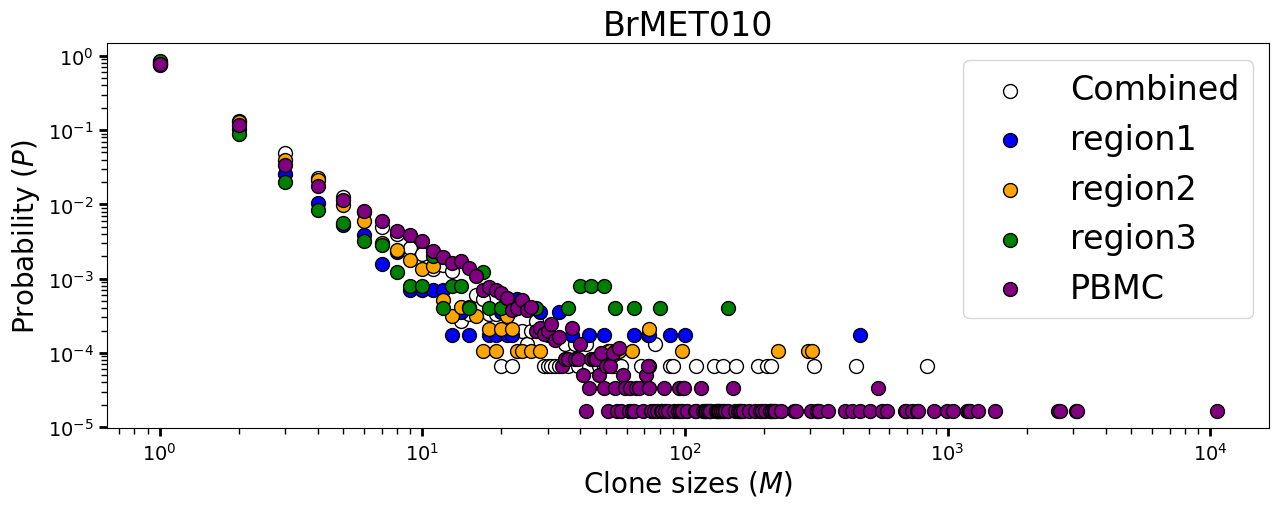

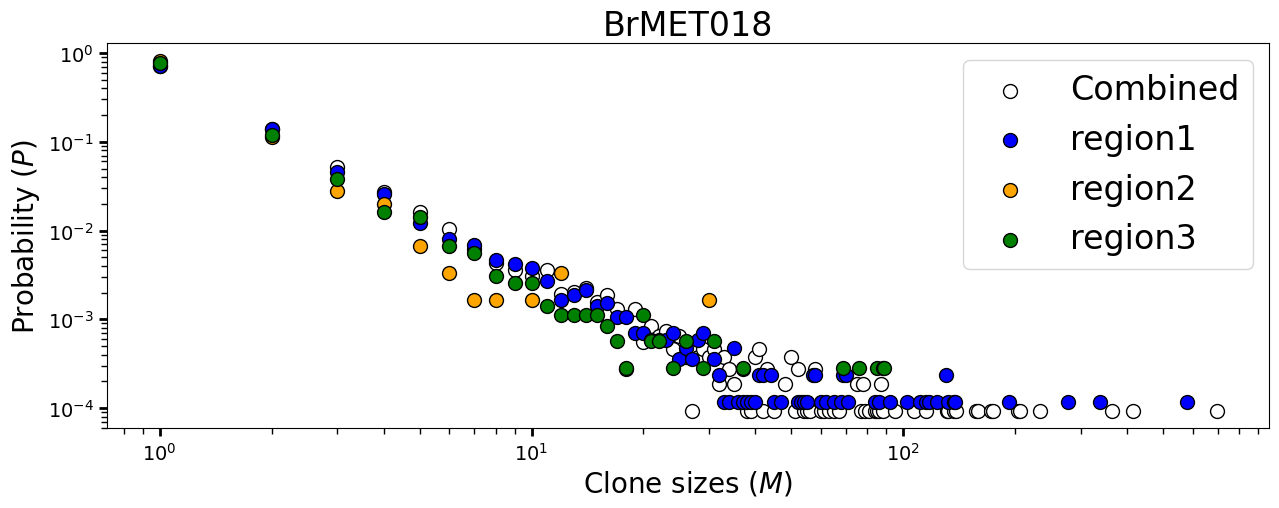

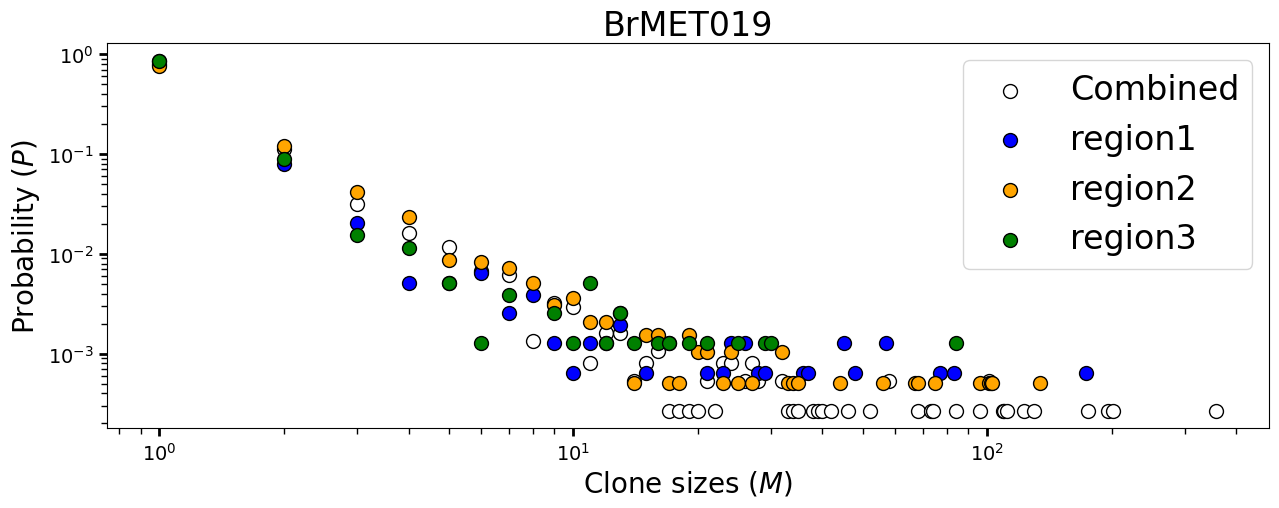

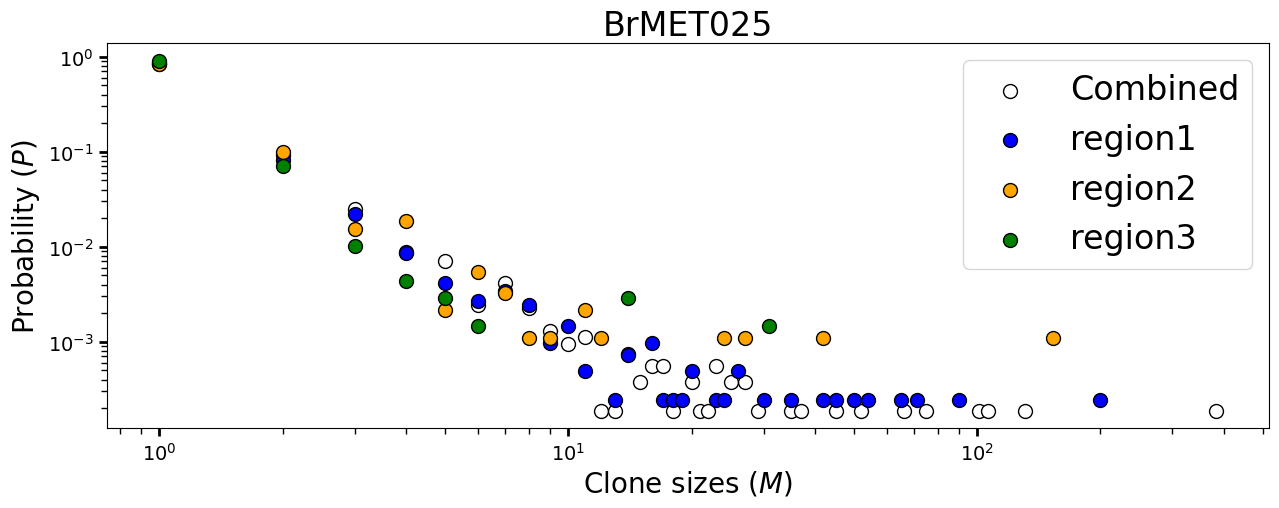

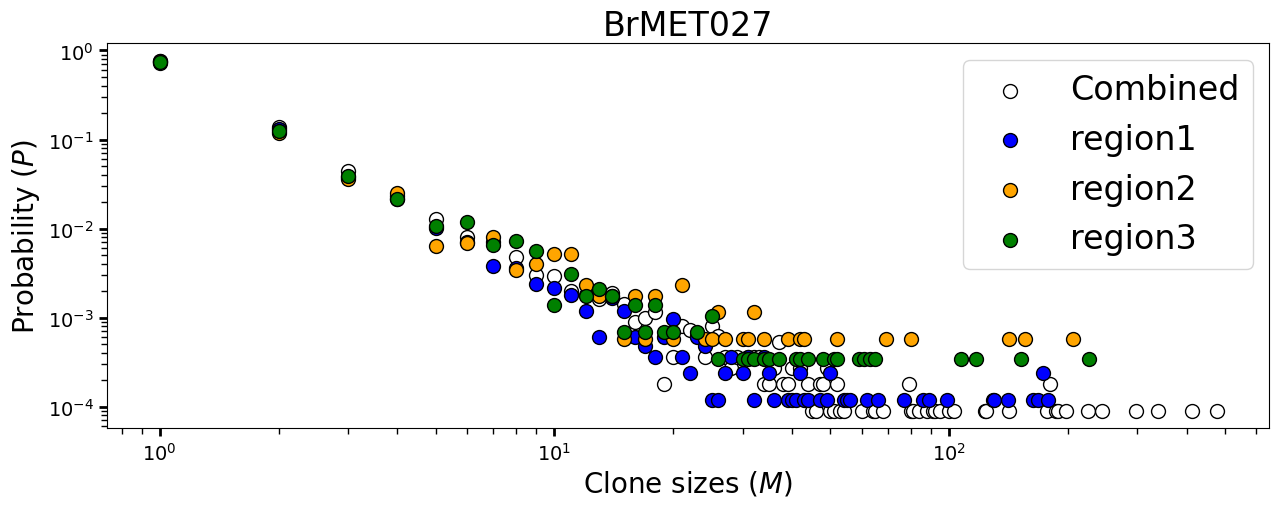

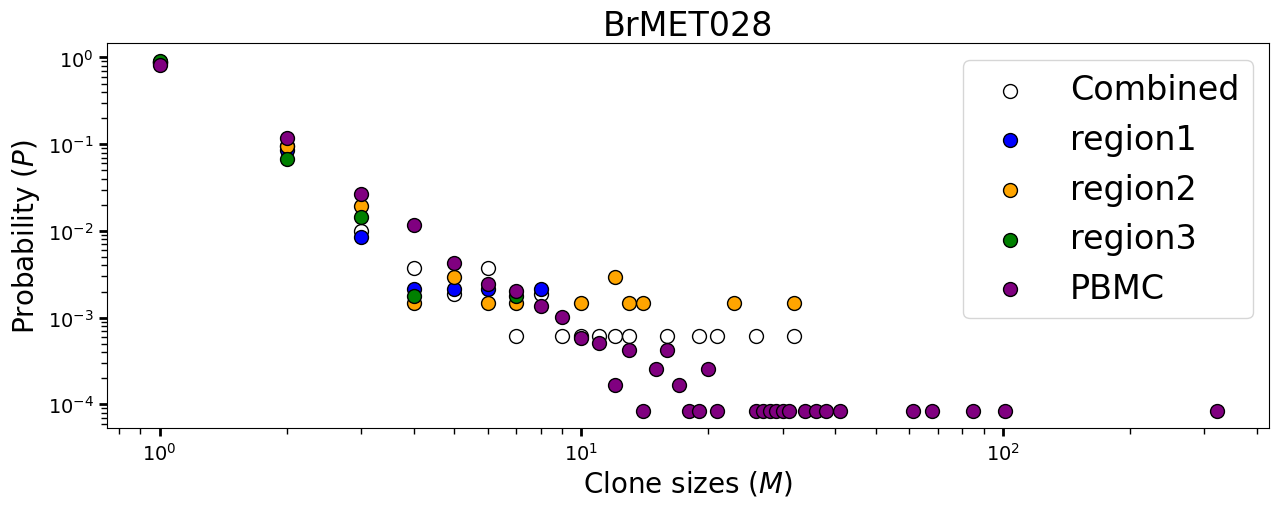

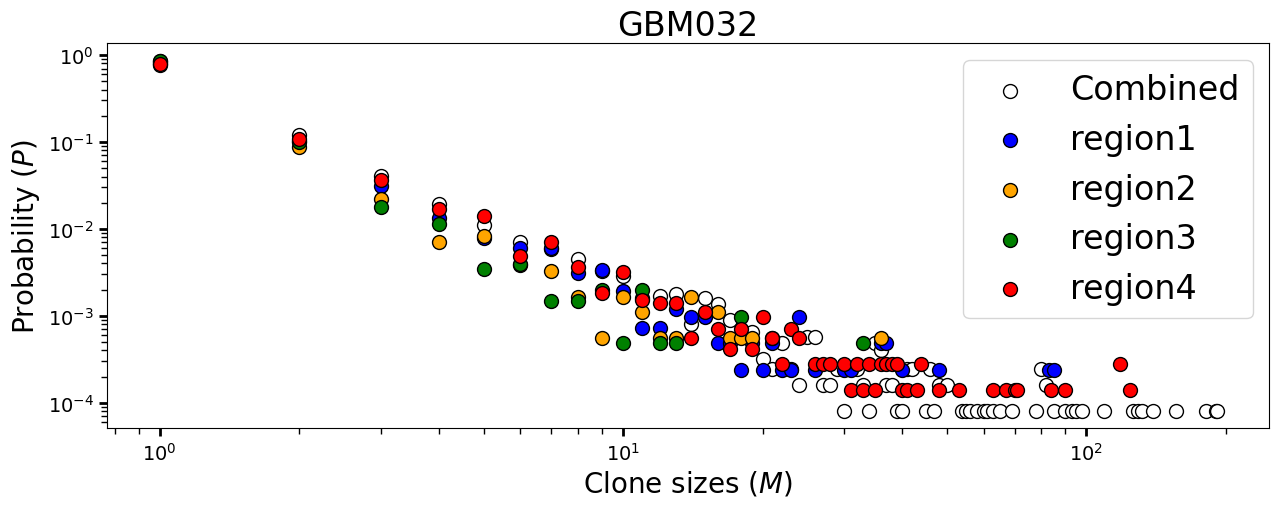

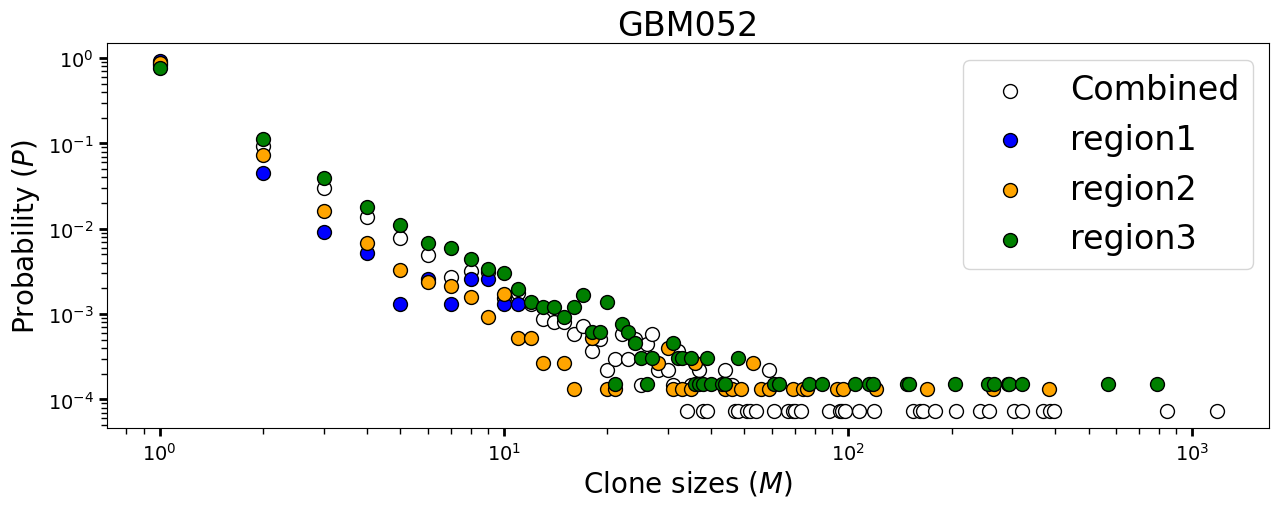

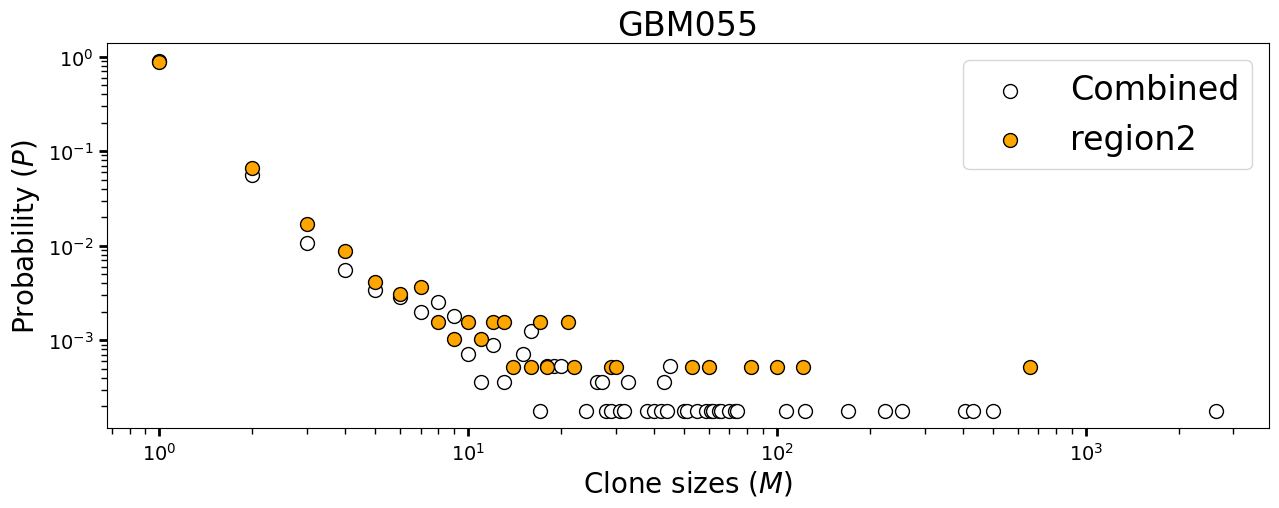

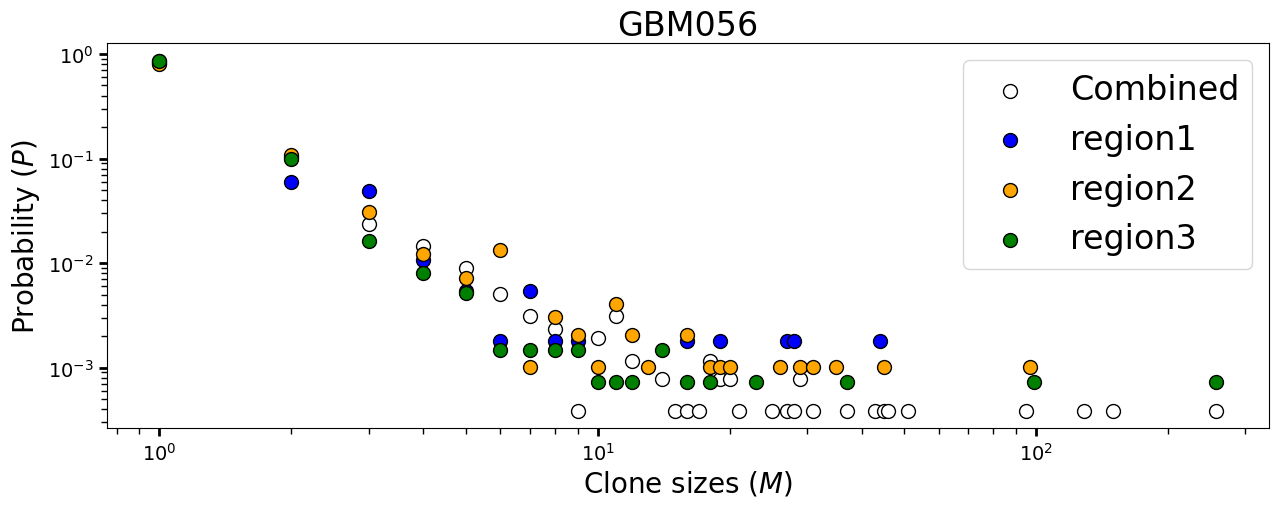

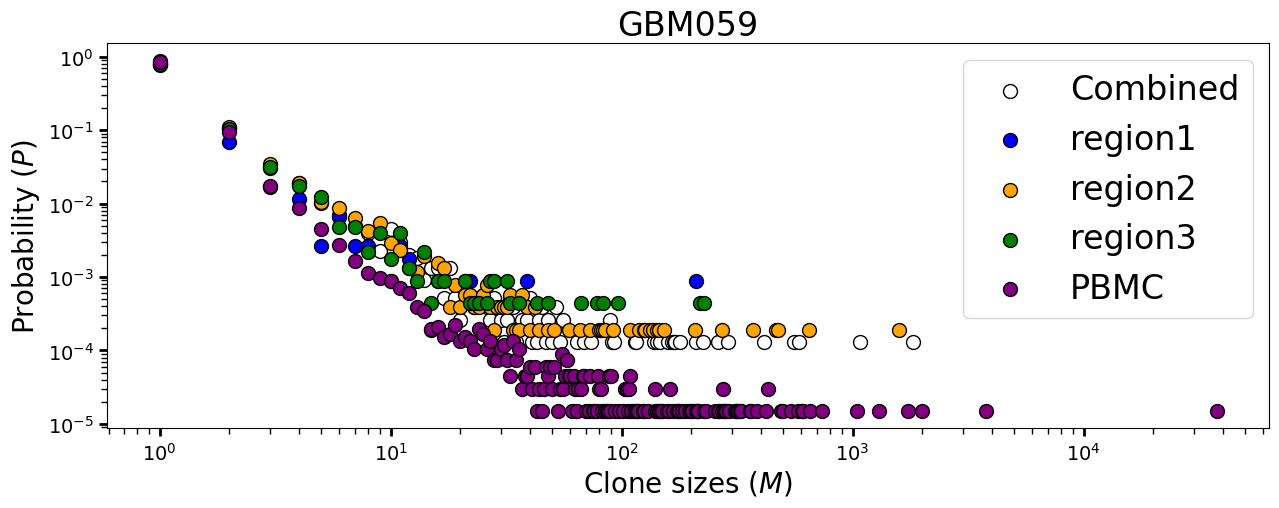

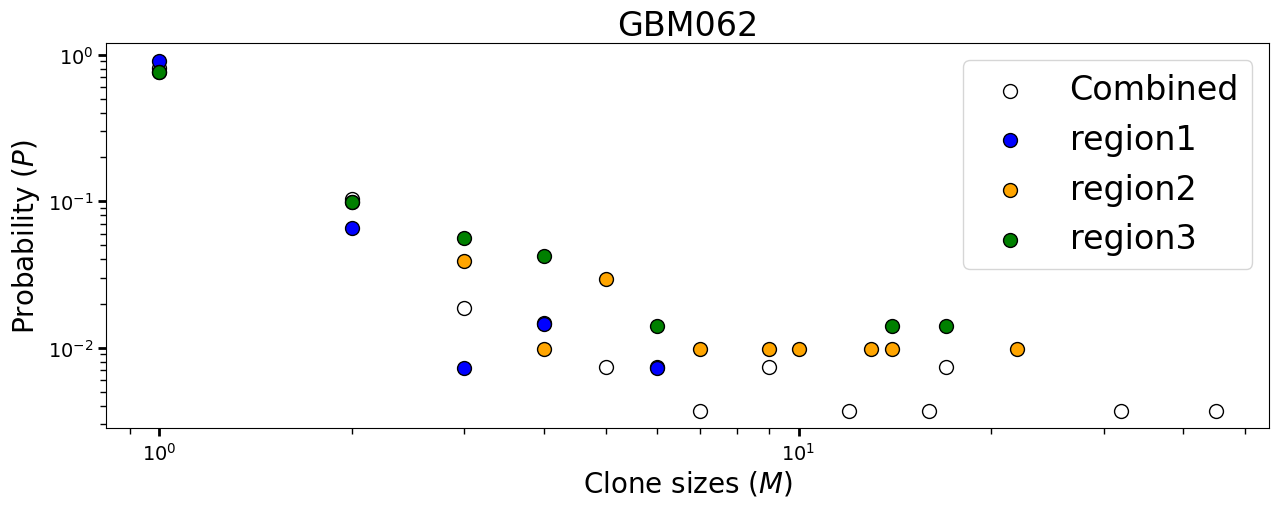

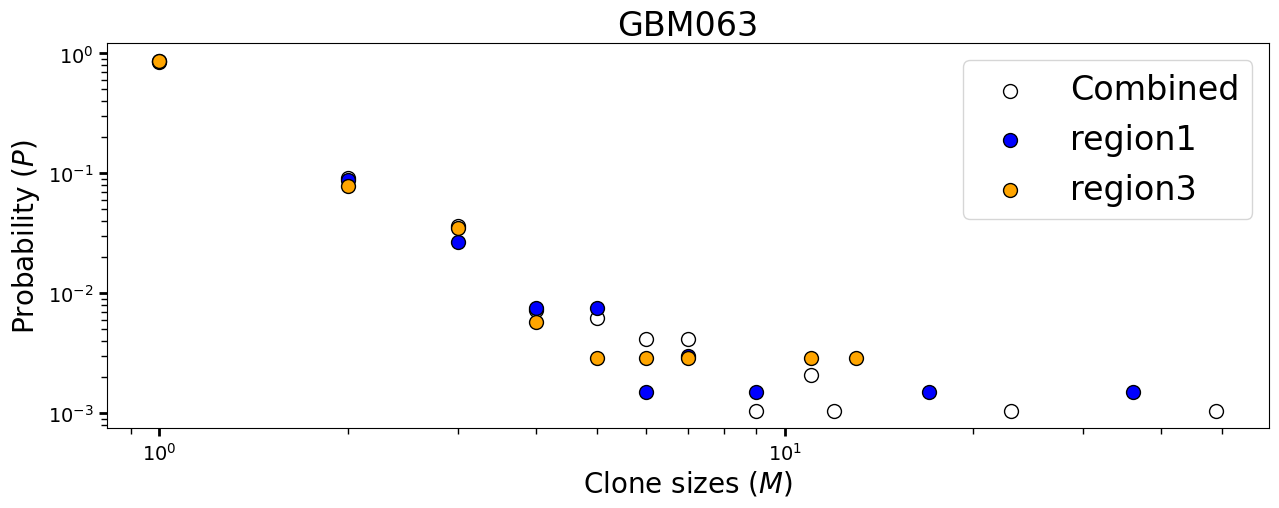

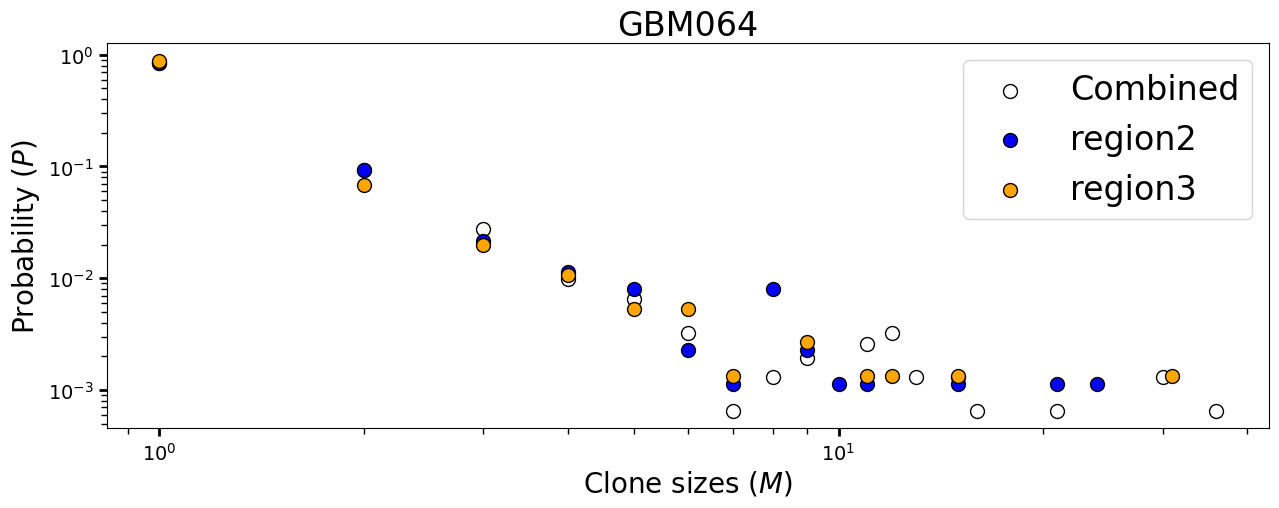

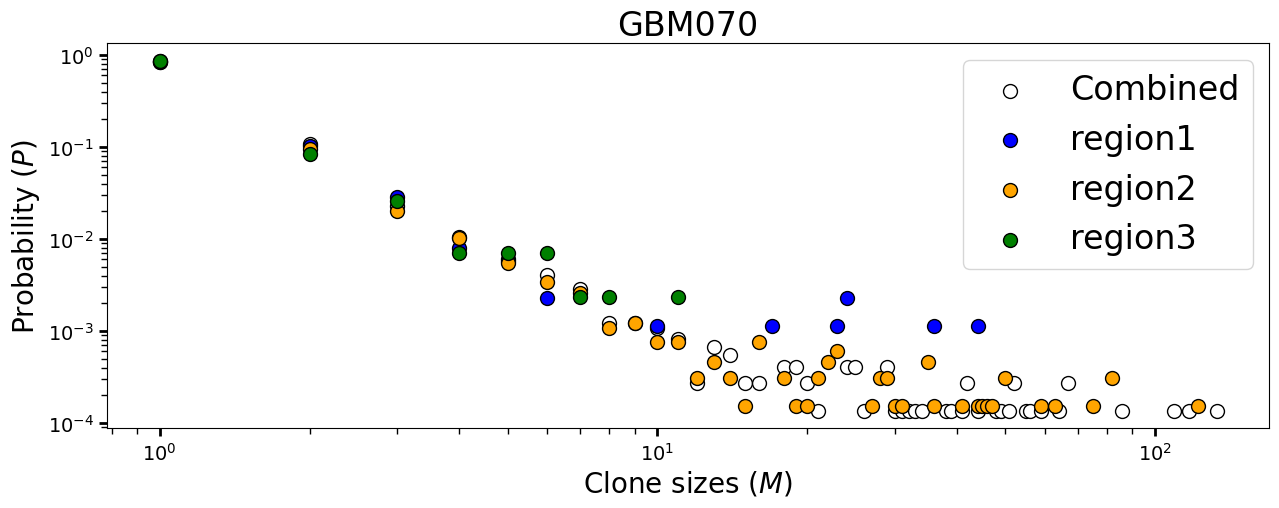

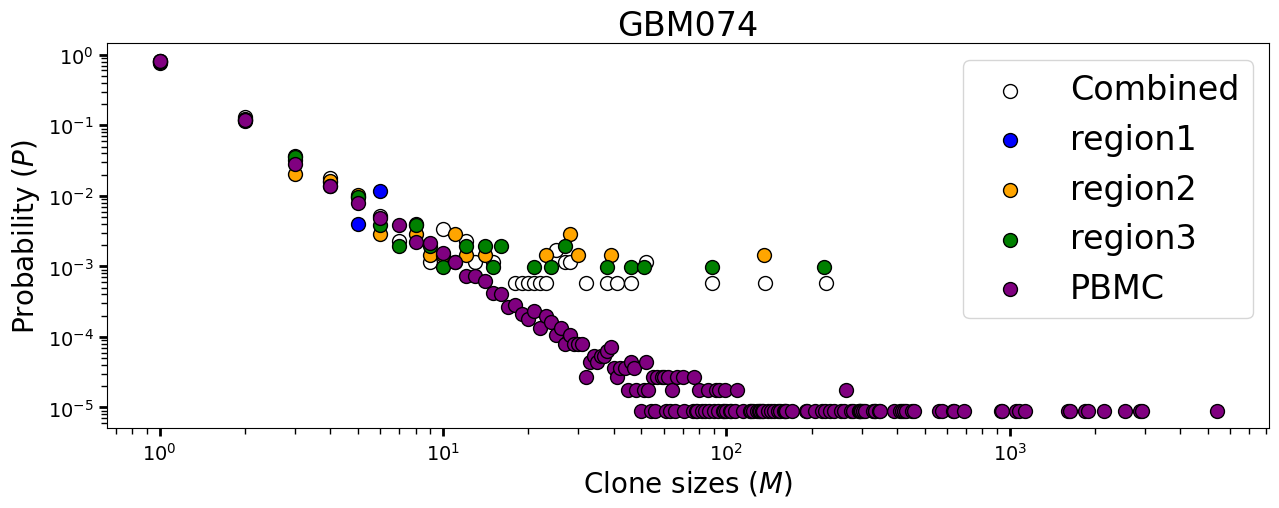

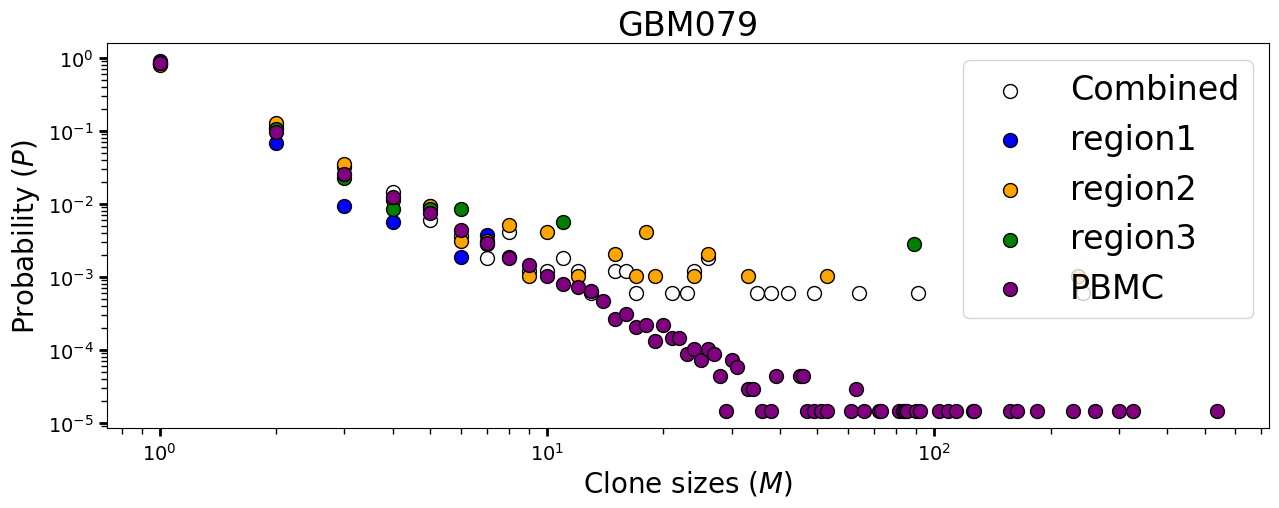

In [21]:
for patient_id in patients[:]:
    plot_pdf_by_region(patient_id)